In [219]:
##Dataset Description:
#The dataset contains various features or columns that provide information about individuals.Some of the columns include 
#gender,smoking_history,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level and the target column dibetes.

##Objective:
#The objective is to develop the best machine learning model that can accurately predict whether an individual has diabetes or not
#based on the given set of features. By analyzing the patterns and relationships within the dataset, the model aims to learn
#from the provided examples to make predictions on unseen data. The trained model can assist in identifying individuals at 
#risk of diabetes or aid in early diagnosis, which can lead to timely interventions and improved healthcare outcomes.

In [134]:
#Making all the required imports
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [135]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [136]:
#loading the data
data = pd.read_csv('diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [137]:
# Count the number of missing values in each column of the dataset
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [138]:
# Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [139]:
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [140]:
# Encode the 'gender' column using LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [141]:
data['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [142]:
#data enconding on the smoking_history column 
data['smoking_history'].replace({'No Info':'1','never':'2','former':'3','current':'4','not current':'5','ever':'6'},inplace = True)

In [143]:
# Generate descriptive statistics of the dataset
data.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<AxesSubplot:>

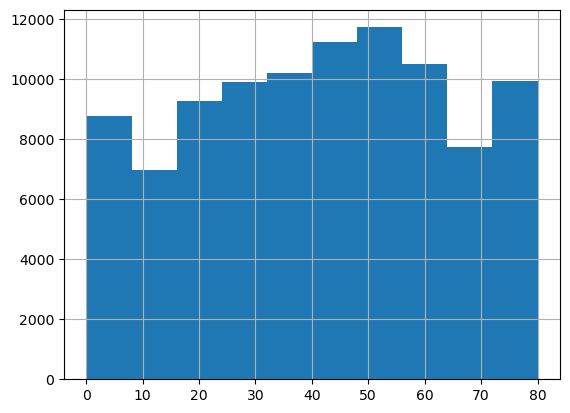

In [144]:
# Plot a histogram of the 'age' column
data['age'].hist()

In [145]:
# Filter out rows with non-integer values in the 'age' column
data = data[data['age'].mod(1) == 0]
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,2,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,2,27.32,5.7,158,0
3,0,36.0,0,0,4,23.45,5.0,155,0
4,1,76.0,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,1,24.60,4.8,145,0
99996,0,2.0,0,0,1,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,2,35.42,4.0,100,0


In [146]:
## convert age column datatype to int
data['age'] = data['age'].astype(int)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,2,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,2,27.32,5.7,158,0
3,0,36,0,0,4,23.45,5.0,155,0
4,1,76,1,1,4,20.14,4.8,155,0


In [147]:
# Display information about the dataset's structure and attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int32  
 1   age                  94133 non-null  int32  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  object 
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 6.5+ MB


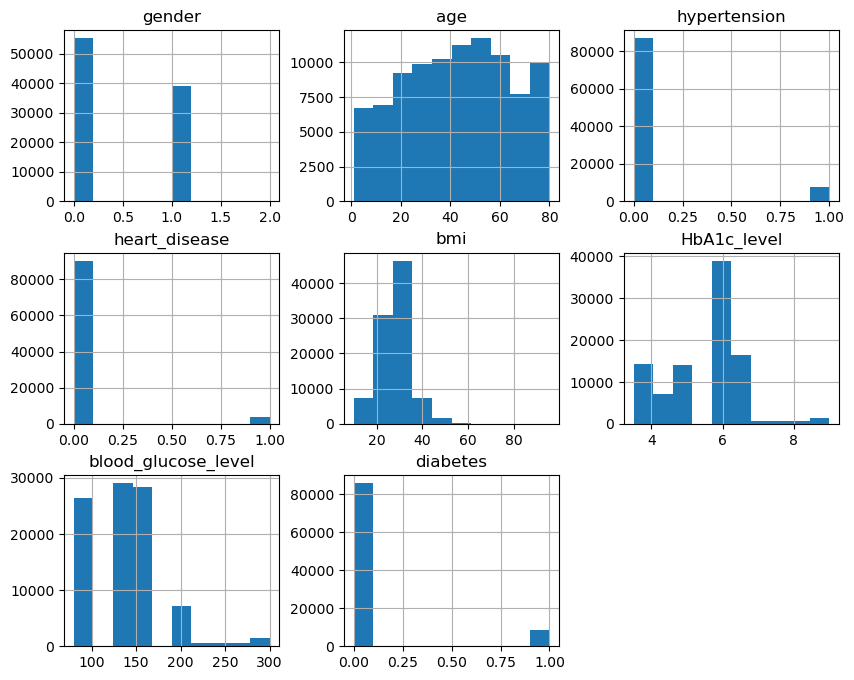

In [148]:
# Plot histograms for each column in the dataset
data.hist(bins=10, figsize=(10,8))
plt.show()

In [149]:
# Split the dataset into features X and target variable y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [150]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [151]:
# Standardizing the feature variables using StandardScaler
sc_X = StandardScaler()
# Scaling the training data
X_train = sc_X.fit_transform(X_train)
# Scaling the test data using the same scaler as the training data
X_test = sc_X.transform(X_test)

## Support vector machine

In [152]:
# Train a support vector machine model with linear kernel using the training data
from sklearn.svm import SVC
linear_kernel = SVC(kernel = 'linear')
linear_kernel.fit(X_train, y_train)

SVC(kernel='linear')

In [153]:
# Make predictions using the linear kernel
y_pred = linear_kernel.predict(X_test)

In [154]:
#Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[17006    71]
 [  716  1034]]


In [155]:
#Compute and print the accuracy score
print(accuracy_score(y_test, y_pred))

0.9581983321825038


In [156]:
# Computing and printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17077
           1       0.94      0.59      0.72      1750

    accuracy                           0.96     18827
   macro avg       0.95      0.79      0.85     18827
weighted avg       0.96      0.96      0.95     18827



## Naive bayes classifier

In [157]:
from sklearn.naive_bayes import GaussianNB
#initializing the Naive Bayes classifier
gnb = GaussianNB()

In [158]:
# Fitting the classifier to the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [159]:
# Predicting the labels for the test data
y_pred_gnb = gnb.predict(X_test)

In [160]:
# Computing and printing the confusion matrix
cm = confusion_matrix(y_test,y_pred_gnb)
print(cm)

[[15914  1163]
 [  590  1160]]


In [161]:
# Computing and printing the accuracy score
print(accuracy_score(y_test,y_pred_gnb))

0.9068890423328199


In [162]:
# Computing and printing the classification report
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     17077
           1       0.50      0.66      0.57      1750

    accuracy                           0.91     18827
   macro avg       0.73      0.80      0.76     18827
weighted avg       0.92      0.91      0.91     18827



## Logistic regression

In [163]:
from sklearn.linear_model import LogisticRegression
#initializing the logistic regression
lr = LogisticRegression()

In [164]:
# Fitting the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [165]:
# Predicting the labels for the test data
y_pred_lr = lr.predict(X_test)

In [166]:
# Computing and printing the confusion matrix
cm = confusion_matrix(y_test,y_pred_lr)
print(cm)

[[16932   145]
 [  633  1117]]


In [167]:
# Computing and printing the accuracy score
print(accuracy_score(y_test,y_pred_lr))

0.9586763690444574


In [168]:
# Computing and printing the classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17077
           1       0.89      0.64      0.74      1750

    accuracy                           0.96     18827
   macro avg       0.92      0.81      0.86     18827
weighted avg       0.96      0.96      0.96     18827



## Decision Tree Classifier

In [169]:
from sklearn.tree import DecisionTreeClassifier
#Initializing the classifier
dtclassifier = DecisionTreeClassifier()

In [170]:
# Fitting the training data
dtclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [171]:
# Predicting the labels for the test data
y_pred_dtc = dtclassifier.predict(X_test)

In [172]:
# Computing and printing the confusion matrix
cm = confusion_matrix(y_test,y_pred_dtc)
print(cm)

[[16583   494]
 [  441  1309]]


In [173]:
# Computing and printing the accuracy score
print(accuracy_score(y_test,y_pred_dtc))

0.9503372815637117


In [174]:
# Computing and printing the classification report
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17077
           1       0.73      0.75      0.74      1750

    accuracy                           0.95     18827
   macro avg       0.85      0.86      0.85     18827
weighted avg       0.95      0.95      0.95     18827



## K-Nearest Neighbors(KNN)

In [240]:
#initializing the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [241]:
# Fitting the classifier to the training data
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [242]:
# Predicting the labels for the test data
y_pred_knn = classifier.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [243]:
# Computing and printing the confusion matrix
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)

[[16959   118]
 [  654  1096]]


In [244]:
# Computing and printing the accuracy score
print(accuracy_score(y_test,y_pred_knn))

0.9589950602857598


In [245]:
# Computing and printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17077
           1       0.94      0.59      0.72      1750

    accuracy                           0.96     18827
   macro avg       0.95      0.79      0.85     18827
weighted avg       0.96      0.96      0.95     18827



## Hyperparameter tuning of the best performing algorithm which is KNN that has an accuracy score of 0.958995

In [276]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [295]:
# Generate an array of 60 random integers between 1 and 30
k = np.random.randint(1,24,30)

In [296]:
# Defining a dictionary of hyperparameters for KNN algorithm
params = { 'n_neighbors': k ,
           'weights': ['uniform', 'distance'],
           'metric': ['euclidean', 'manhattan']}

In [297]:
# Perform randomized search for hyperparameter tuning using cross-validation
random_search = RandomizedSearchCV(classifier,params,n_iter=5,cv=5,n_jobs=-1,verbose=0)
# Fitting the final model using the best hyperparameters
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([15,  9, 22,  4,  4, 18,  3, 21, 16, 17,  2, 14, 22, 10, 14, 22,  5,
       17, 14,  2, 18, 17,  8, 20,  4,  1, 23,  9,  1,  5]),
                                        'weights': ['uniform', 'distance']})

In [298]:
#Printing out the best combination of hyperparameters after tuning
print(random_search.best_params_)

{'weights': 'uniform', 'n_neighbors': 8, 'metric': 'manhattan'}


In [299]:
#Computing and printing out the train and test accuracy score
print("train score : " + str(random_search.score(X_train,y_train)))
print("test score : " + str(random_search.score(X_test,y_test)))

train score : 0.9630308341964784
test score : 0.9604291708716205


In [300]:
y_pred_tuned = random_search.predict(X_test)

In [301]:
# Computing and printing the confusion matrix of the tuned model
cm = confusion_matrix(y_test,y_pred_tuned)
print(cm)

[[17056    21]
 [  724  1026]]


In [302]:
# Computing and printing the accuracy score of the tuned model
print(accuracy_score(y_test,y_pred_tuned))

0.9604291708716205


In [303]:
# Computing and printing the classification report of the tuned model
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17077
           1       0.98      0.59      0.73      1750

    accuracy                           0.96     18827
   macro avg       0.97      0.79      0.86     18827
weighted avg       0.96      0.96      0.96     18827

